In [1]:
!pip install -q filterpy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.0/178.0 kB 2.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [2]:
from filterpy.kalman import KalmanFilter
from filterpy.common import Q_discrete_white_noise

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
class K3:
  def __init__(self, dt, P, Q, R):
    self.K = KalmanFilter(dim_x=3, dim_z=1)
    self.K.x = np.zeros([3,1])
    self.K.F = np.array([[1, dt, 0.5*dt*dt],
                        [0,  1,  dt],
                        [0,  0,  1]])

    self.K.H = np.array([[1, 0, 0]])
    self.K.P *= P
    self.K.R = R
    self.K.Q = Q_discrete_white_noise(dim=3, dt=dt, var=Q)

  def simulate(self, t, z0, z, skip):
    qX = []
    for u in z[::skip]:
      self.K.update(u)
      for _ in range(skip):
        self.K.predict()
        qX.append(self.K.x[0])
    self.truth = pd.Series(np.array(z0).flatten(), index=t)
    self.track = pd.Series(np.array(qX).flatten(), index=t)
    self.measurements = pd.Series(np.array(z[::skip]).flatten(), index=t[::skip])
    return self

  def plot(self, title=None):
    deviations = self.track - self.truth
    self.measurements.plot(style='o', alpha=0.35, label="measurements")
    self.track.plot(style='-', linewidth=4, alpha=0.75, label="track")
    self.truth.plot(style='k-', linewidth=0.5, alpha=0.9, label="true path")
    plt.legend()
    if title is not None:
      plt.title(f'{title}: bias={deviations.mean():0.3f}, spread={deviations.std():0.3f}')
    plt.show()

In [5]:
class K3_z2:
  def __init__(self, dt, P, Q, R):
    self.K = KalmanFilter(dim_x=3, dim_z=2)
    self.K.x = np.zeros([3,1])
    self.K.F = np.array([[1,  dt, 0.5*dt*dt],
                         [0,  1,  dt],
                         [0,  0,  1]])
    self.K.H = np.array([[1, 0, 0],[0,1,0]])
    self.K.P *= P
    self.K.R = np.array([[float(R), 0],[0,float(R)]])
    self.K.Q = Q_discrete_white_noise(dim=3, dt=dt, var=Q)


  def simulate(self, t, z0, z, skip):
    qX = []
    for u in z[::skip]:
      self.K.update(u)
      for _ in range(skip):
        self.K.predict()
        qX.append(self.K.x[0])
    self.truth = pd.Series(np.array(z0[:,0]).flatten(), index=t)
    self.track = pd.Series(np.array(qX).flatten(), index=t)
    self.measurements = pd.Series(np.array(z[::skip,0]).flatten(), index=t[::skip])
    return self

  def plot(self, title=None):
    deviations = self.track - self.truth
    self.measurements.plot(style='o', alpha=0.35, label="measurements")
    self.track.plot(style='-', linewidth=4, alpha=0.75, label="track")
    self.truth.plot(style='k-', linewidth=0.5, alpha=0.9, label="true path")
    plt.legend()
    if title is not None:
      plt.title(f'{title}: bias={deviations.mean():0.3f}, spread={deviations.std():0.3f}')
    plt.show()

In [6]:
class K3_z3:
  def __init__(self, dt, P, Q, R):
    self.K = KalmanFilter(dim_x=7, dim_z=3)
    self.K.x = np.zeros([7,1])
    self.K.F = np.array([[1,  0,  dt, 0,  0.5*dt*dt,  0,         0],
                         [0,  1,  0,  dt, 0,         0.5*dt*dt,  0],
                         [0,  0,  1,   0, dt,         0,         0],
                         [0,  0,  0,   1, 0,          dt,        0],
                         [0,  0,  0,   0, 1,          0,         0],
                         [0,  0,  0,   0, 0,          1,         0],
                         [0,  0,  0,   0, 0,          0,         1]])
    self.K.H = np.array([[1, 0, 0, 0, 0, 0, 0],[0,1,0, 0, 0, 0, 0],[0, 0, 0, 0, 0, 0, 1]])
    self.K.P *= P
    self.K.R = np.array([[float(R), 0, 0],[0,float(R), 0], [0, 0, float(R)]])
    self.K.Q = Q_discrete_white_noise(dim=7, dt=dt, var=Q)


  def simulate(self, t, z0, z, skip):
    qX = []
    for u in z[::skip]:
      self.K.update(u)
      for _ in range(skip):
        self.K.predict()
        qX.append(self.K.x[0])
    self.truth = pd.Series(np.array(z0[:,0]).flatten(), index=t)
    self.track = pd.Series(np.array(qX).flatten(), index=t)
    self.measurements = pd.Series(np.array(z[::skip,0]).flatten(), index=t[::skip])
    return self

  def plot(self, title=None):
    deviations = self.track - self.truth
    self.measurements.plot(style='o', alpha=0.35, label="measurements")
    self.track.plot(style='-', linewidth=4, alpha=0.75, label="track")
    self.truth.plot(style='k-', linewidth=0.5, alpha=0.9, label="true path")
    plt.legend()
    if title is not None:
      plt.title(f'{title}: bias={deviations.mean():0.3f}, spread={deviations.std():0.3f}')
    plt.show()

In [ ]:
zA = np.array([1,1])
zB = np.array([np.nan, 1])
zC = np.array([1, np.nan])

zA, zB, zC

(array([1, 1]), array([nan,  1.]), array([ 1., nan]))

In [ ]:
np.isnan(zA), np.isnan(zB), np.isnan(zC)

(array([False, False]), array([ True, False]), array([False,  True]))

In [ ]:
I = np.identity(2)
I

array([[1., 0.],
       [0., 1.]])

In [ ]:
zA[~np.isnan(zA)], zB[~np.isnan(zB)], zC[~np.isnan(zC)]

(array([1, 1]), array([1.]), array([1.]))

In [ ]:
I[~np.isnan(zA),:], I[~np.isnan(zB),:], I[~np.isnan(zC),:]

(array([[1., 0.],
        [0., 1.]]),
 array([[0., 1.]]),
 array([[1., 0.]]))

In [ ]:
np.matmul([0,1], [[1,0,0],[0,1,0]])

array([0, 1, 0])

In [ ]:
R = np.array([[float(5), 0       ],
              [0,        float(10)]])
W = np.array([[1,0],[0,1]])
np.matmul(W, np.matmul(R, W.T))

array([[ 5.,  0.],
       [ 0., 10.]])

In [7]:
class K3_z2:
  def __init__(self, dt, P, Q, R):
    self.K = KalmanFilter(dim_x=3, dim_z=2)
    self.K.x = np.zeros([3,1])
    self.K.F = np.array([[1,  dt, 0.5*dt*dt],
                         [0,  1,  dt],
                         [0,  0,  1]])
    self.H = np.array([[1, 0, 0],
                         [0, 1, 0]])
    self.K.H = self.H
    self.K.P *= P
    self.R = np.array([[float(R), 0       ],
                         [0,        float(R)]])
    self.K.R = self.R
    self.K.Q = Q_discrete_white_noise(dim=3, dt=dt, var=Q)

  def update(self, z):
    I = np.identity(2)
    u = z[~np.isnan(z)].reshape(-1,1)
    W = I[~np.isnan(z).flatten(),:]
    self.K.dim_z = np.sum(~np.isnan(z).flatten())
    self.K._H = np.matmul(W, self.H)
    self.K._R = np.matmul(W, np.matmul(self.R, W.T))
    self.K.update(u, H=self.K._H, R=self.K._R)
    #self.K.update(z)

  def predict(self):
    self.K.predict()
    print(self.K.x)

  def simulate(self, t, z0, z, skip):
    qX = []
    for u in z[::skip]:
      self.update(u)
      for _ in range(skip):
        self.predict()
        qX.append(self.K.x[0])
    self.truth = pd.Series(np.array(z0[:,0]).flatten(), index=t)
    self.track = pd.Series(np.array(qX).flatten(), index=t)
    self.measurements = pd.Series(np.array(z[::skip,0]).flatten(), index=t[::skip])
    return self

  def plot(self, title=None):
    deviations = self.track - self.truth
    self.measurements.plot(style='o', alpha=0.35, label="measurements")
    self.track.plot(style='-', linewidth=4, alpha=0.75, label="track")
    self.truth.plot(style='k-', linewidth=0.5, alpha=0.9, label="true path")
    plt.legend()
    if title is not None:
      plt.title(f'{title}: bias={deviations.mean():0.3f}, spread={deviations.std():0.3f}')
    plt.show()

In [8]:
class K3_z2_pdl:
  def __init__(self, dt, P, Q, R):
    self.K = KalmanFilter(dim_x=3, dim_z=2)
    self.K.x = np.zeros([3,1])
    self.K.F = np.array([[1,  dt, 0.5*dt*dt],
                         [0,  1,  dt],
                         [0,  0,  1]])
    self.K.H = np.array([[1, 0, 0],[0,1,0]])
    self.K.P *= P
    self.K.R = np.array([[float(R), 0],[0,float(R)]])
    self.K.Q = Q_discrete_white_noise(dim=3, dt=dt, var=Q)

  def simulate(self, t1, t2, z0, z, skip):
    qX = []
    for i in range(0, np.union1d(t1,t2), skip):
      if i in np.inton1d(t1,t2):
        u_ = u
# implement the rest
      self.K.update(u)
      for _ in range(skip):
        self.K.predict()
        qX.append(self.K.x[0])
    self.truth = pd.Series(np.array(z0[:,0]).flatten(), index=t)
    self.track = pd.Series(np.array(qX).flatten(), index=t)
    self.measurements = pd.Series(np.array(z[::skip,0]).flatten(), index=t[::skip])
    return self



  def plot(self, title=None):
    deviations = self.track - self.truth
    self.measurements.plot(style='o', alpha=0.35, label="measurements")
    self.track.plot(style='-', linewidth=4, alpha=0.75, label="track")
    self.truth.plot(style='k-', linewidth=0.5, alpha=0.9, label="true path")
    plt.legend()
    if title is not None:
      plt.title(f'{title}: bias={deviations.mean():0.3f}, spread={deviations.std():0.3f}')
    plt.show()

In [9]:
def trajectory(dt):
  t = np.arange(0,100, dt)
  z0 = 0.1*t + 2*np.sin(np.pi*t/10)
  z = z0 + 0.5*(np.random.rand(t.shape[0]) - 0.5)
  return t, z0, z

In [10]:
def trajectory_z2(dt):
  t = np.arange(0,100, dt)
  z0 = []
  z = []
  for i in t:
    z0.append(np.array([[0.1*i + 2*np.sin(np.pi*i/10)], [0.1 + (np.pi/5)*np.cos(np.pi*i/10)]]))
    z.append(np.array([
        [0.1*i + 2*np.sin(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5) if i%2 == 0 else np.nan],
        [0.1 + (np.pi/5)*np.cos(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5)]
      ]))trajectory_circle(0.1)
  return t, np.asarray(z0), np.asarray(z)

In [11]:
def trajectory_z2_pdl(dt):
  t1 = np.arange(0,100, dt)
  t2 = np.arange(0,200, dt)

  z0 = []
  z = []
  for i in np.union1d(t1,t2):   #Find the union of two arrays. Return the unique, sorted array of values that are in either of the two input arrays
    z0.append(np.array([[0.1*i + 2*np.sin(np.pi*i/10)], [0.1 + (np.pi/5)*np.cos(np.pi*i/10)]]))
    z.append(np.array([[0.1*i + 2*np.sin(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5)], [0.1 + (np.pi/5)*np.cos(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5)]]))

  return t1, t2, np.asarray(z0), np.asarray(z)

In [32]:
def r(t):
  return 15*np.sin(np.pi*t/10) +15*np.cos(np.pi*t/10) + 0.5*(np.random.random(t.shape) - 0.5)

def v(t):
  return 1.5*np.cos(np.pi*t/10) - 1.5*np.sin(np.pi*t/10) + (np.random.random(t.shape) - 0.5)


def f(t):
  return - 0.15*np.sin(np.pi*t/10) - 0.15*np.cos(np.pi*t/10) + (np.random.random(t.shape) - 0.5)


def trajectory_circle(dt):
  t1 = np.arange(0,200, dt)
  t2 = np.arange(0,200, dt)

  z0 = []
  z = []

  for i in np.union1d(t1,t2):
    z0.append(np.array([[15*np.sin(np.pi*i/10)], [15*np.cos(np.pi*i/10)]]))
    z.append(np.array([[15*np.sin(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5)], [15*np.cos(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5)]]))


  return t1, t2, np.asarray(z0), np.asarray(z)

In [24]:
t = np.arange(0,100, 0.2)
position = pd.Series(r(t), index=t)

In [25]:
t = np.arange(0,100, 0.1)
velocity = pd.Series(v(t), index=t)

In [26]:
t = np.arange(0,100, 0.3)
accel = pd.Series(f(t), index=t)

In [27]:
df2 = pd.concat([position,velocity, accel], axis=1).sort_index()
df2

,0,1,2
0.0,14.878306,1.941209,-0.232388
0.1,NaN,1.659083,NaN
0.2,16.004452,1.544260,NaN
0.3,NaN,NaN,-0.199734
0.3,NaN,0.853809,NaN
...,...,...,...
99.6,13.235694,1.903846,NaN
99.7,NaN,1.577058,NaN
99.8,14.006734,1.977356,NaN
99.9,NaN,NaN,-0.340688


In [50]:
max(circle[0,1])

15.0

In [44]:
circle_sim = trajectory_circle(0.1)[3]

In [45]:
circle = trajectory_circle(0.1)[2]

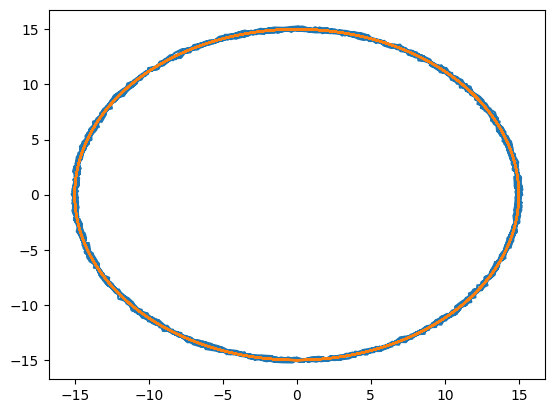

<Figure size 2000x2000 with 0 Axes>

In [49]:
plt.plot(circle_sim[:,0],circle_sim[:,1])
plt.plot(circle[:,0],circle[:,1])
plt.figure(figsize = [20,20])
plt.show()

In [51]:
K3_z3(0.1, 1, 1, 0.01).simulate(*trajectory_circle(0.1), 10).plot("R = 0.01")

ValueError: dim must be between 2 and 4

In [52]:
from filterpy.common import kinematic_kf

In [53]:
kf = kinematic_kf(dim=3, order=2, dt=0.1)

In [54]:
kf.F

array([[1.   , 0.1  , 0.005, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 1.   , 0.1  , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 1.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 1.   , 0.1  , 0.005, 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 1.   , 0.1  , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.1  , 0.005],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   , 0.1  ],
       [0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 1.   ]])

In [62]:
kf.H[2,6:8] = [0, 1]

In [63]:
kf.H

array([[1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0.]])

In [64]:
omega = 1
R = 100

In [86]:
#results = []
for _ in range(100):
  kf.update([0 + np.random.normal(0, 0.05),
             R*omega**2 + np.random.normal(0, 1),
             omega + np.random.normal(0, 0.1)])
  kf.predict()
  results.append(kf.x.flatten())

In [87]:
df = pd.DataFrame(results)
df

,0,1,2,3,4,5,6,7,8
0,0.000000,0.000000,0.000000,100.000397,0.002790,0.003061,10.241117,1.000001,0.000005
1,0.000000,0.000000,0.000000,100.000380,0.002659,0.002836,10.341117,1.000001,0.000004
2,0.000000,0.000000,0.000000,100.000362,0.002524,0.002620,10.441117,1.000001,0.000004
3,0.000000,0.000000,0.000000,100.000343,0.002387,0.002415,10.541117,1.000001,0.000003
4,0.000000,0.000000,0.000000,100.000325,0.002250,0.002220,10.641117,1.000000,0.000003
...,...,...,...,...,...,...,...,...,...
395,-0.033544,-0.052611,-0.033258,100.534892,0.501315,0.247425,51.418624,0.911663,-0.112355
396,-0.086071,-0.122067,-0.067347,100.199635,-0.016782,-0.032399,51.525846,0.987667,-0.040164
397,-0.009096,-0.003114,-0.002557,100.214396,0.003286,-0.020384,51.638929,1.059869,0.022907
398,0.008870,0.022310,0.010680,100.751414,0.754928,0.368124,51.751055,1.093790,0.049081


<Axes: >

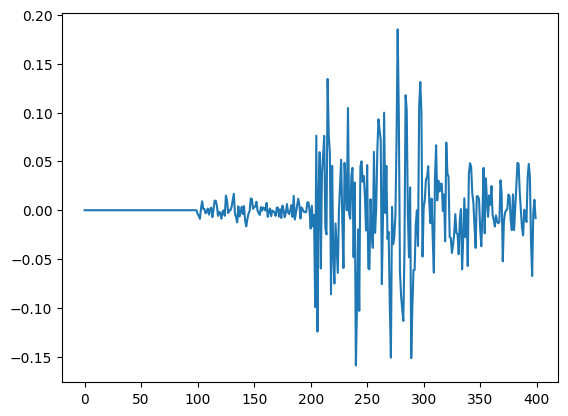

In [96]:
df.iloc[:,2].plot()

In [ ]:
def r(t):
  return 0.1*t + 2*np.sin(np.pi*t/10) + 0.5*(np.random.random(t.shape) - 0.5)

def v(t):
  return 0.1 + (np.pi/5)*np.cos(np.pi*t/10) + 0.5*(np.random.random(t.shape) - 0.5)


def trajectory_z2_pdl(dt):
  t1 = np.arange(0,100, dt)
  t2 = np.arange(0,200, dt)

  z0 = []
  z = []
  for i in np.union1d(t1,t2):
    z0.append(np.array([[0.1*i + 2*np.sin(np.pi*i/10)], [0.1 + (np.pi/5)*np.cos(np.pi*i/10)]]))
    z.append(np.array([[0.1*i + 2*np.sin(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5)], [0.1 + (np.pi/5)*np.cos(np.pi*i/10)+ 0.5*(np.random.rand() - 0.5)]]))

  return t1, t2, np.asarray(z0), np.asarray(z)

In [ ]:
t = np.arange(0,100, 0.2)
position = pd.Series(r(t), index=t)

In [ ]:
t = np.arange(0,100, 0.1)
velocity = pd.Series(v(t), index=t)

In [ ]:
df = pd.concat([position,velocity], axis=1).sort_index()
df

,0,1
0.0,0.246026,0.750954
0.1,NaN,0.488245
0.2,0.186188,0.757654
0.3,NaN,0.633760
0.4,0.443396,0.769068
...,...,...
99.5,NaN,0.613008
99.6,9.802801,0.839056
99.7,NaN,0.586741
99.8,9.834892,0.567976


In [ ]:
df.iloc[1].values

array([       nan, 0.48824455])

In [ ]:
z = df.iloc[1].fillna(0).values
W = np.diag(df.iloc[1].notnull().astype(int).values)
z, W

(array([0.        , 0.48824455]),
 array([[0, 0],
        [0, 1]]))

In [ ]:
np.matmul(W, z)

array([0.        , 0.48824455])

In [ ]:
np.diag([1,1, 0])

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 0]])

In [ ]:
(~df.iloc[0].isna()).astype(int).values

array([1, 1])

In [ ]:
"t,z0,z = trajectory_z2(10)

In [ ]:
print(z[0])

[[-0.2008397 ]
 [ 0.90263547]]


In [ ]:
for _ in z[::2]:
  print(_)
  print(type(_))

[[-0.2008397 ]
 [ 0.90263547]]
<class 'numpy.ndarray'>
[[2.21227246]
 [0.64828132]]
<class 'numpy.ndarray'>
[[3.83393711]
 [0.82973468]]
<class 'numpy.ndarray'>
[[5.81113923]
 [0.74333278]]
<class 'numpy.ndarray'>
[[7.88524319]
 [0.51620551]]
<class 'numpy.ndarray'>


In [ ]:
K3_z2(0.1, 1, 1, 0.01)

In [ ]:
K3_z2(0.1, 1, 1, 0.01).K.P = K3_z2(0.1, 1, 1, 0.01).K.P * 0.2

In [ ]:
K3_z2(0.1, 1, 1, 0.01).K.F

array([[1.   , 0.1  , 0.005],
       [0.   , 1.   , 0.1  ],
       [0.   , 0.   , 1.   ]])

In [ ]:
K3_z2(0.1, 1, 1, 0.01).K.x

array([[0.],
       [0.],
       [0.]])

In [ ]:
obj1 = K3_z2(0.1, 1, 1, 0.01)

In [ ]:
obj1.K.x = np.array([[0.],[0.],[1.]])

In [ ]:
obj1.K.x

array([[0.],
       [0.],
       [1.]])

In [ ]:
z[:,0]

array([[0.19114865],
       [0.83790172],
       [2.23318678],
       [3.14932172],
       [4.10099622],
       [4.83497639],
       [5.96617546],
       [7.03581391],
       [7.79792344],
       [9.17875918]])

In [ ]:
trajectory_z2(0.1)

(array([ 0. ,  0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ,
         1.1,  1.2,  1.3,  1.4,  1.5,  1.6,  1.7,  1.8,  1.9,  2. ,  2.1,
         2.2,  2.3,  2.4,  2.5,  2.6,  2.7,  2.8,  2.9,  3. ,  3.1,  3.2,
         3.3,  3.4,  3.5,  3.6,  3.7,  3.8,  3.9,  4. ,  4.1,  4.2,  4.3,
         4.4,  4.5,  4.6,  4.7,  4.8,  4.9,  5. ,  5.1,  5.2,  5.3,  5.4,
         5.5,  5.6,  5.7,  5.8,  5.9,  6. ,  6.1,  6.2,  6.3,  6.4,  6.5,
         6.6,  6.7,  6.8,  6.9,  7. ,  7.1,  7.2,  7.3,  7.4,  7.5,  7.6,
         7.7,  7.8,  7.9,  8. ,  8.1,  8.2,  8.3,  8.4,  8.5,  8.6,  8.7,
         8.8,  8.9,  9. ,  9.1,  9.2,  9.3,  9.4,  9.5,  9.6,  9.7,  9.8,
         9.9, 10. , 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9,
        11. , 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12. ,
        12.1, 12.2, 12.3, 12.4, 12.5, 12.6, 12.7, 12.8, 12.9, 13. , 13.1,
        13.2, 13.3, 13.4, 13.5, 13.6, 13.7, 13.8, 13.9, 14. , 14.1, 14.2,
        14.3, 14.4, 14.5, 14.6, 14.7, 

[[-0.08244813]
 [ 0.91714274]
 [ 0.        ]]
[[0.00926614]
 [0.91714274]
 [0.        ]]
[[0.10098042]
 [0.91714274]
 [0.        ]]
[[0.19269469]
 [0.91714274]
 [0.        ]]
[[0.28440897]
 [0.91714274]
 [0.        ]]
[[0.37612324]
 [0.91714274]
 [0.        ]]
[[0.46783751]
 [0.91714274]
 [0.        ]]
[[0.55955179]
 [0.91714274]
 [0.        ]]
[[0.65126606]
 [0.91714274]
 [0.        ]]
[[0.74298034]
 [0.91714274]
 [0.        ]]
[[ 0.77674751]
 [ 0.79148494]
 [-0.14823782]]
[[ 0.85515482]
 [ 0.77666116]
 [-0.14823782]]
[[ 0.93207974]
 [ 0.76183738]
 [-0.14823782]]
[[ 1.00752229]
 [ 0.7470136 ]
 [-0.14823782]]
[[ 1.08148246]
 [ 0.73218981]
 [-0.14823782]]
[[ 1.15396025]
 [ 0.71736603]
 [-0.14823782]]
[[ 1.22495567]
 [ 0.70254225]
 [-0.14823782]]
[[ 1.2944687 ]
 [ 0.68771847]
 [-0.14823782]]
[[ 1.36249936]
 [ 0.67289469]
 [-0.14823782]]
[[ 1.42904764]
 [ 0.65807091]
 [-0.14823782]]
[[1.27092899]
 [0.69246404]
 [0.49872469]]
[[1.34266902]
 [0.74233651]
 [0.49872469]]
[[1.41939629]
 [0.792

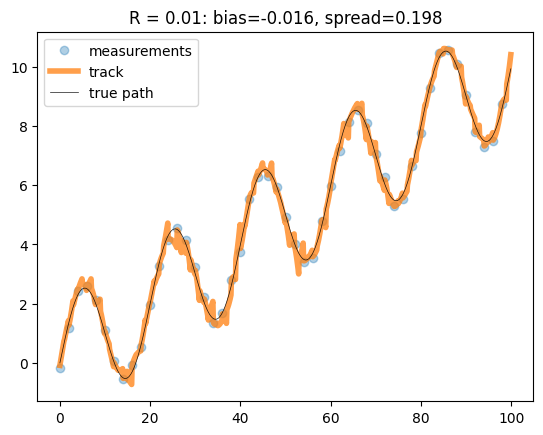

In [ ]:
K3_z2(0.1, 1, 1, 0.01).simulate(*trajectory_z2(0.1), 10).plot("R = 0.01")

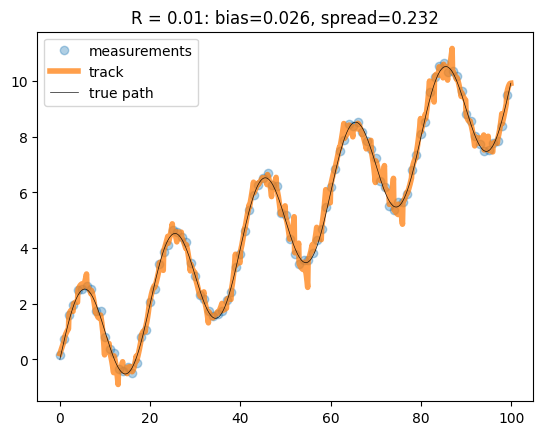

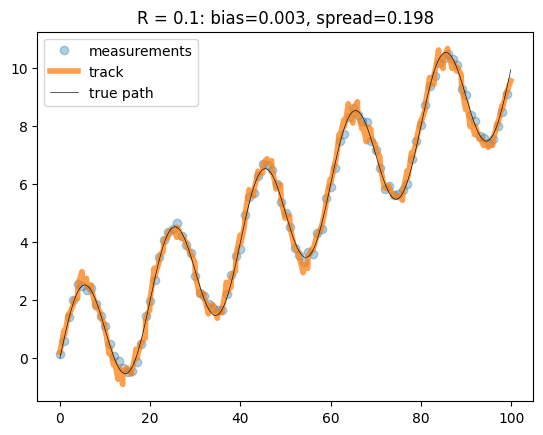

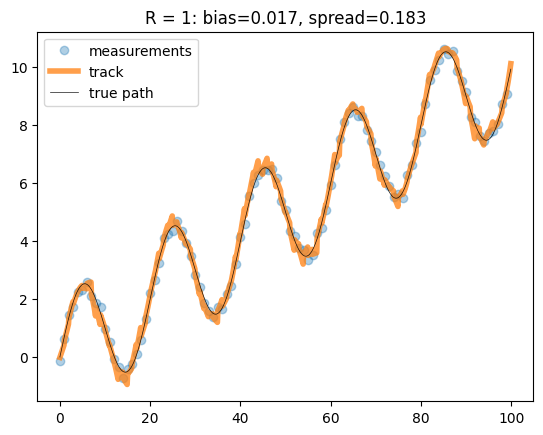

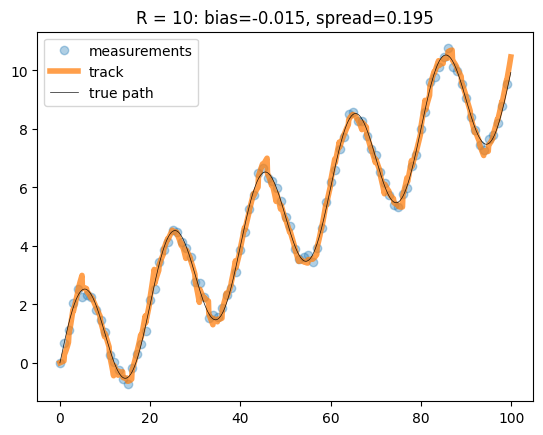

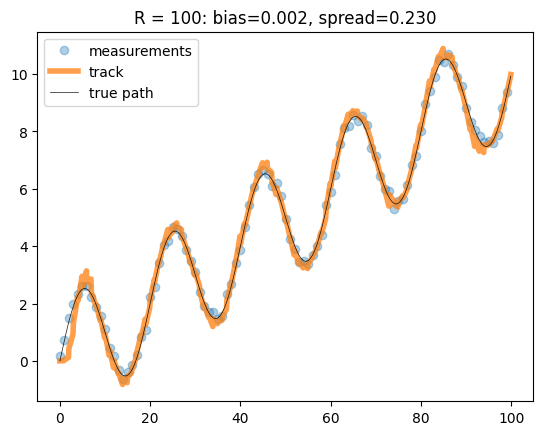

In [ ]:
K3_z2(0.1, 1, 1, 0.01).simulate(*trajectory_z2(0.1), 10).plot("R = 0.01")
K3_z2(0.1, 1, 1, 0.1).simulate(*trajectory_z2(0.1), 10).plot("R = 0.1")
K3_z2(0.1, 1, 1, 1.0).simulate(*trajectory_z2(0.1), 10).plot("R = 1")
K3_z2(0.1, 1, 1, 10.0).simulate(*trajectory_z2(0.1), 10).plot("R = 10")
K3_z2(0.1, 1, 1, 100.0).simulate(*trajectory_z2(0.1), 10).plot("R = 100")

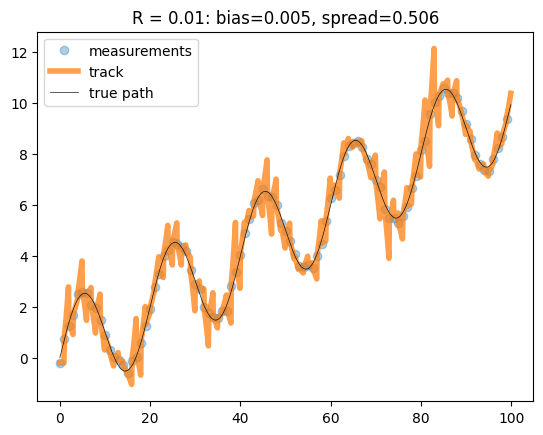

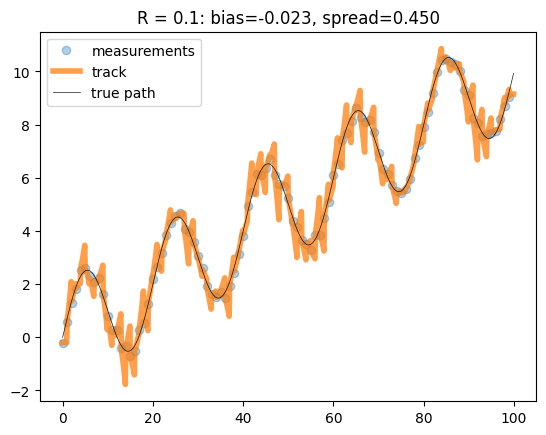

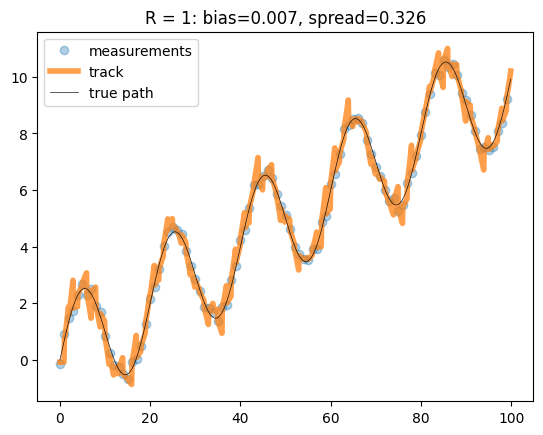

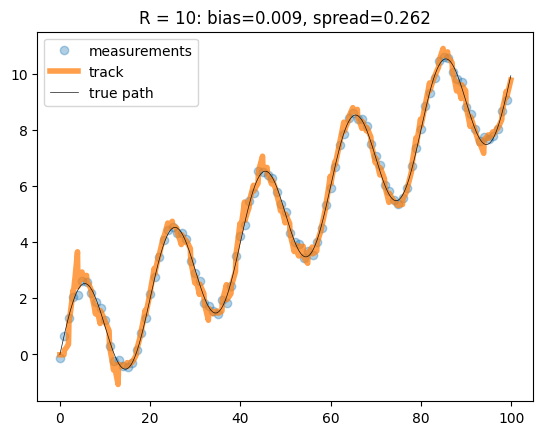

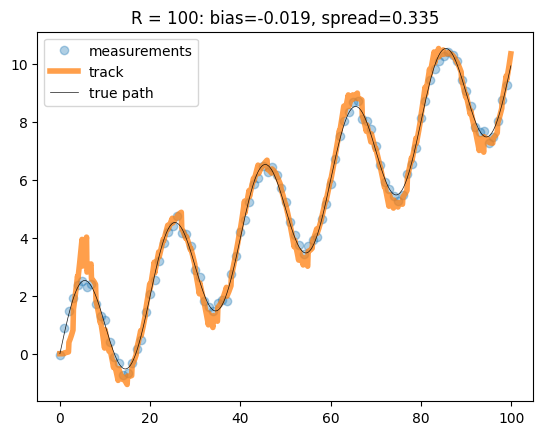

In [ ]:
K3(0.1, 1, 1, 0.01).simulate(*trajectory(0.1), 10).plot("R = 0.01")
K3(0.1, 1, 1, 0.1).simulate(*trajectory(0.1), 10).plot("R = 0.1")
K3(0.1, 1, 1, 1.0).simulate(*trajectory(0.1), 10).plot("R = 1")
K3(0.1, 1, 1, 10.0).simulate(*trajectory(0.1), 10).plot("R = 10")
K3(0.1, 1, 1, 100.0).simulate(*trajectory(0.1), 10).plot("R = 100")

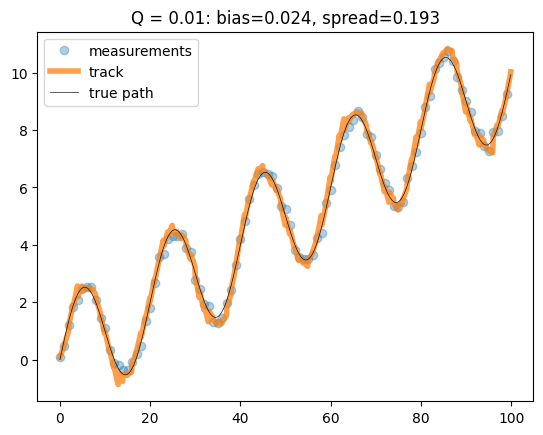

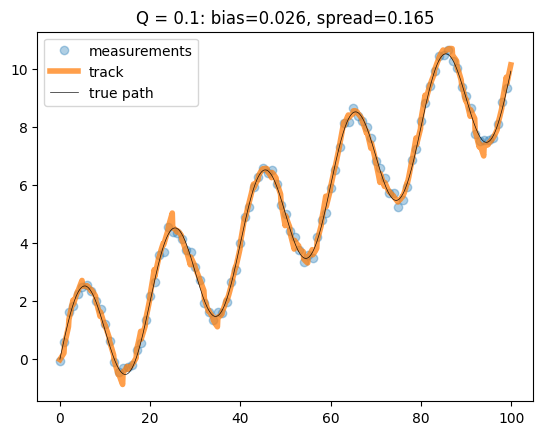

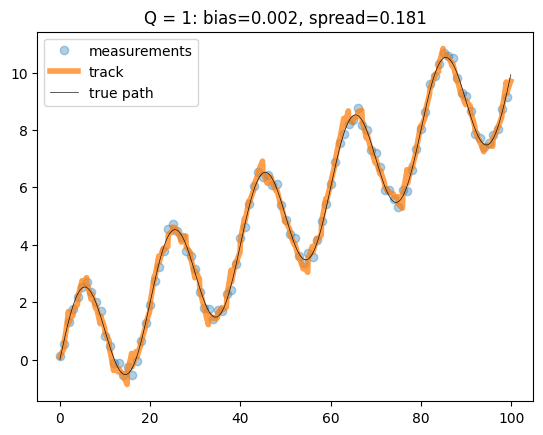

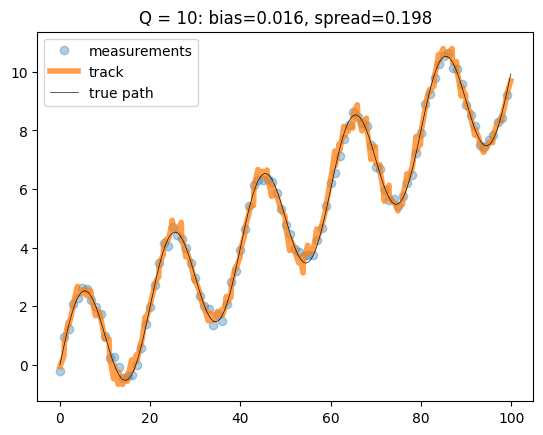

In [ ]:
K3_z2(0.1, 1, 0.01, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 0.01")
K3_z2(0.1, 1, 0.1, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 0.1")
K3_z2(0.1, 1, 1, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 1")
K3_z2(0.1, 1, 10, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 10")

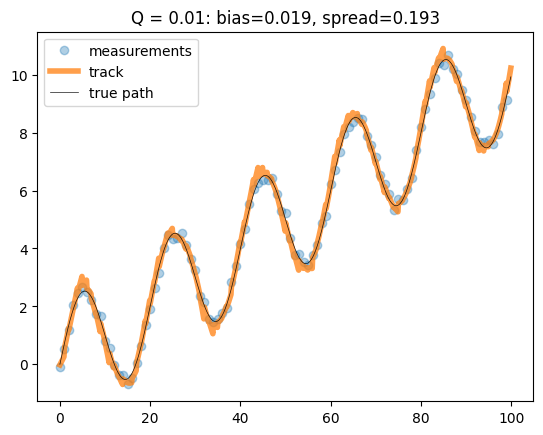

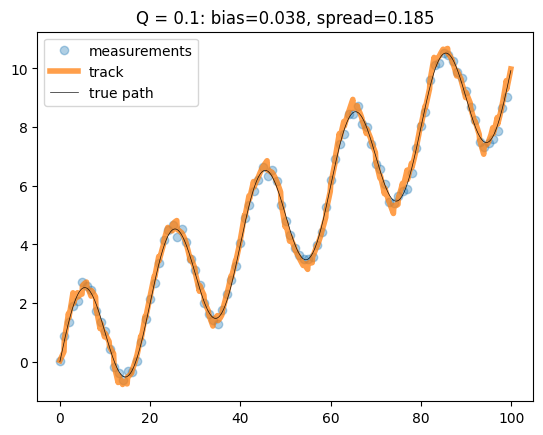

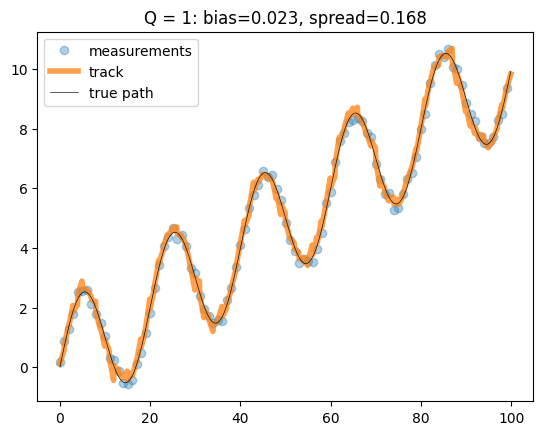

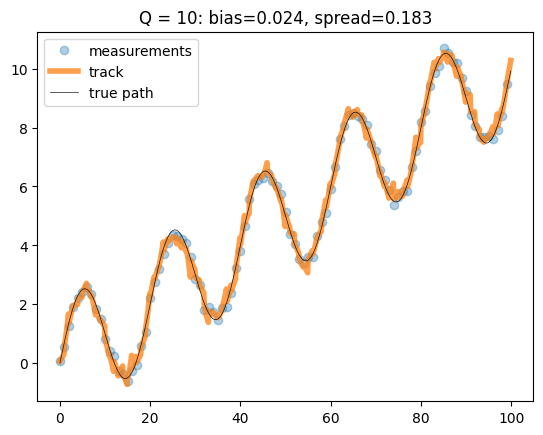

In [ ]:
K3_z2(0.1, 1, 0.01, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 0.01")
K3_z2(0.1, 1, 0.1, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 0.1")
K3_z2(0.1, 1, 1, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 1")
K3_z2(0.1, 1, 10, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 10")

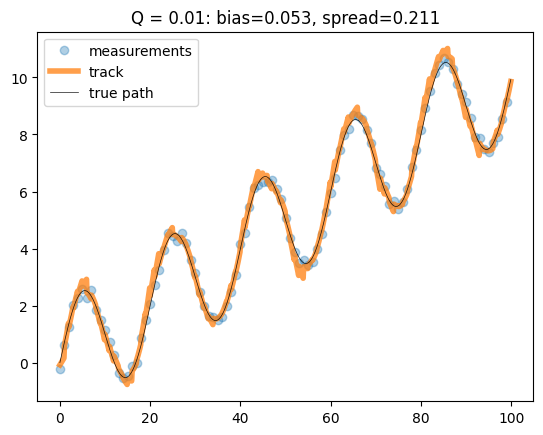

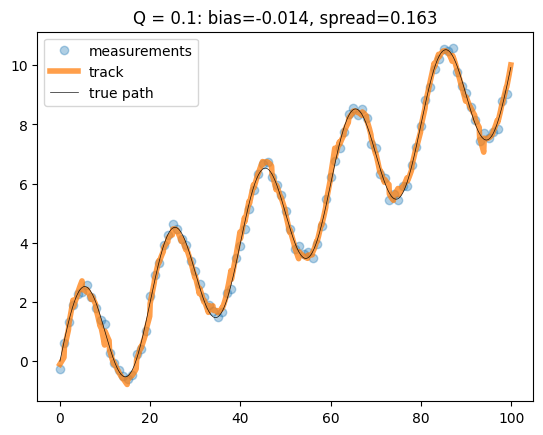

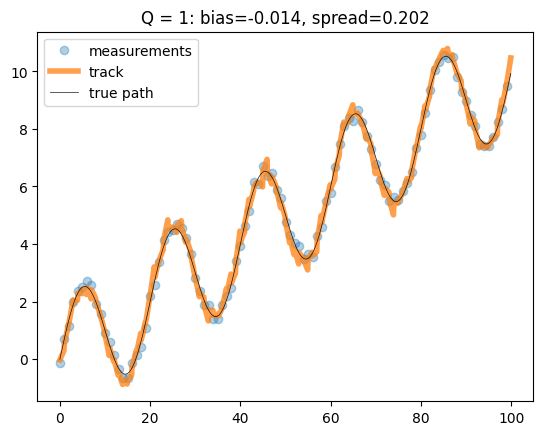

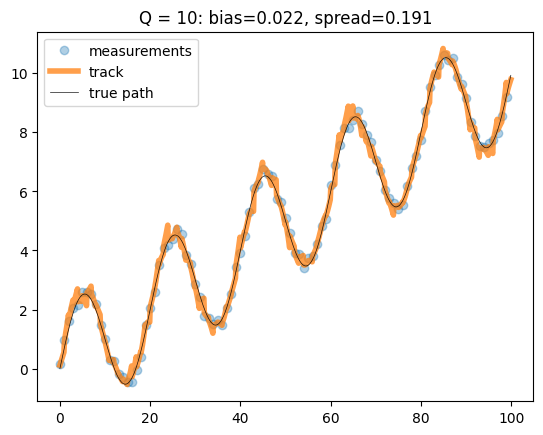

In [ ]:
K3_z2(0.1, 1, 0.01, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 0.01")
K3_z2(0.1, 1, 0.1, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 0.1")
K3_z2(0.1, 1, 1, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 1")
K3_z2(0.1, 1, 10, 1).simulate(*trajectory_z2(0.1), 10).plot("Q = 10")

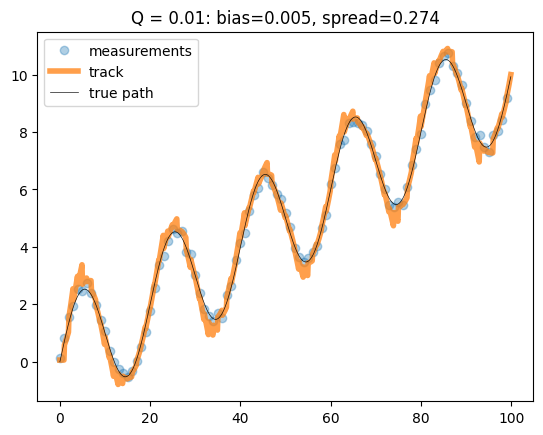

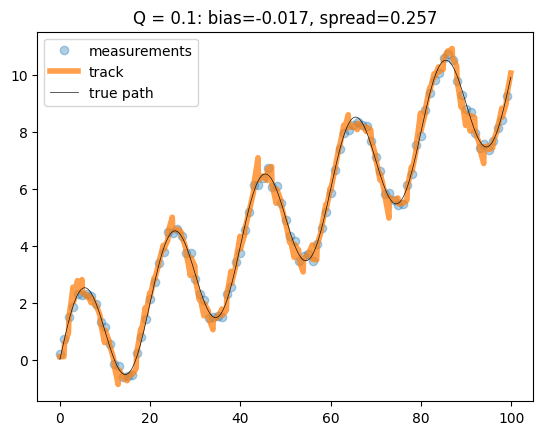

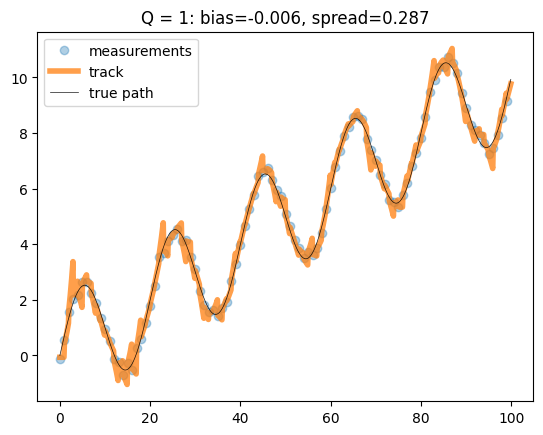

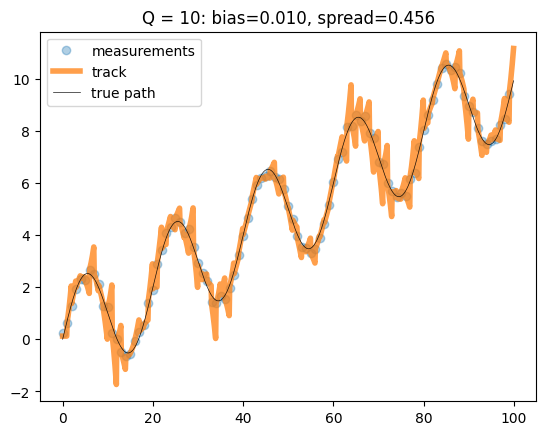

In [ ]:
K3(0.1, 1, 0.01, 1).simulate(*trajectory(0.1), 10).plot("Q = 0.01")
K3(0.1, 1, 0.1, 1).simulate(*trajectory(0.1), 10).plot("Q = 0.1")
K3(0.1, 1, 1, 1).simulate(*trajectory(0.1), 10).plot("Q = 1")
K3(0.1, 1, 10, 1).simulate(*trajectory(0.1), 10).plot("Q = 10")

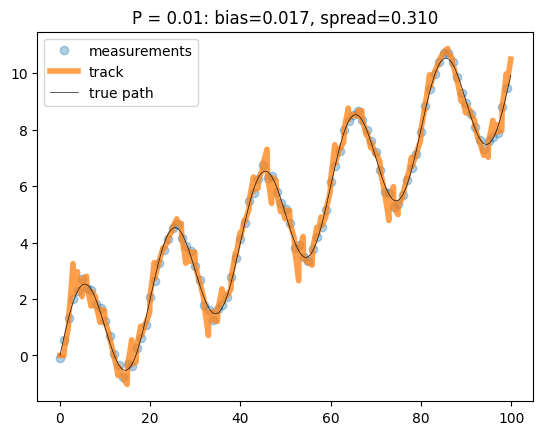

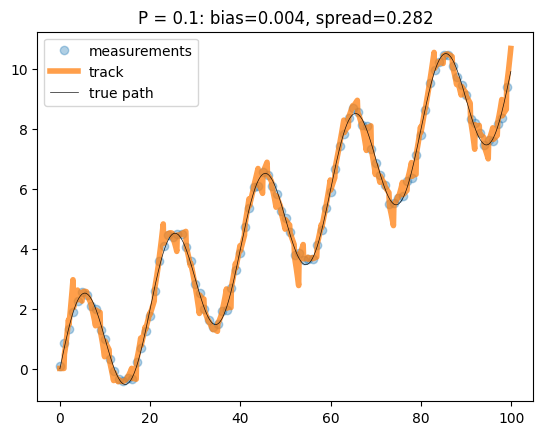

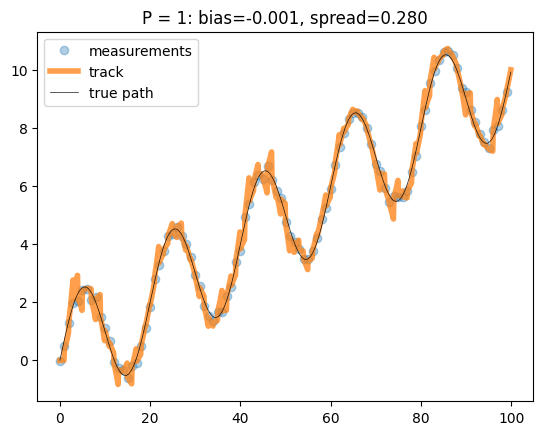

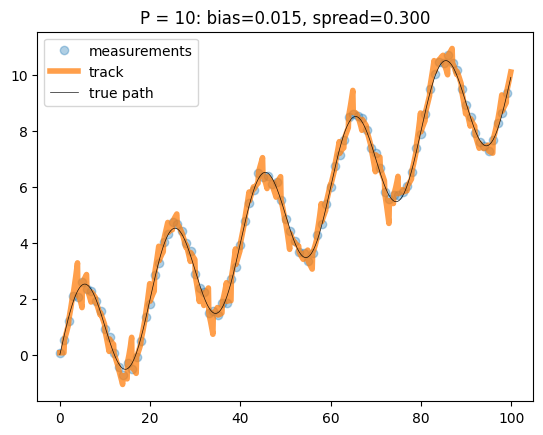

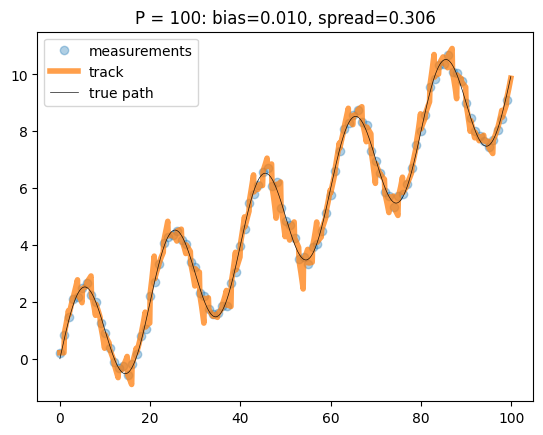

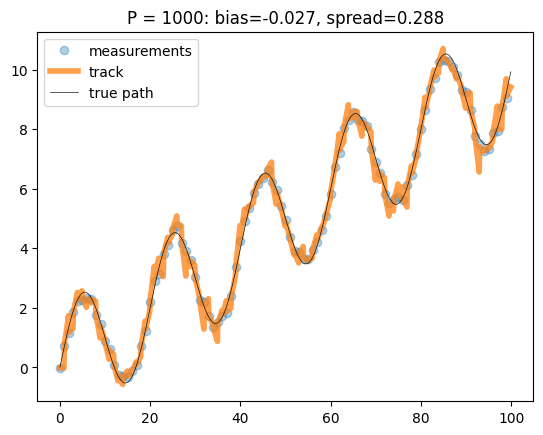

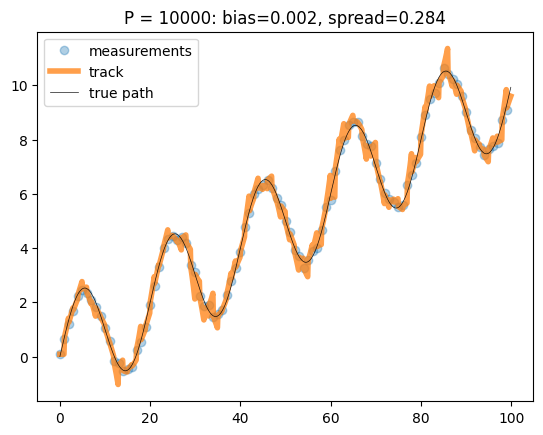

In [ ]:
K3(0.1, 0.01, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 0.01")
K3(0.1, 0.1, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 0.1")
K3(0.1, 1, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 1")
K3(0.1, 10, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 10")
K3(0.1, 100, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 100")
K3(0.1, 1000, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 1000")
K3(0.1, 10000, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 10000")

In [ ]:
class K2:
  def __init__(self, dt, P, Q, R):
    self.K = KalmanFilter(dim_x=2, dim_z=1)
    self.K.x = np.zeros([2,1])
    self.K.F = np.array([[1,  dt],
                         [0,  1 ]])
    self.K.H = np.array([[1, 0]])
    self.K.P *= P
    self.K.R = R
    self.K.Q = Q_discrete_white_noise(dim=2, dt=dt, var=Q)

  def simulate(self, t, z0, z, skip):
    qX = []
    for u in z[::skip]:
      self.K.update(u)
      for _ in range(skip):
        self.K.predict()
        qX.append(self.K.x[0])
    self.truth = pd.Series(np.array(z0).flatten(), index=t)
    self.track = pd.Series(np.array(qX).flatten(), index=t)
    self.measurements = pd.Series(np.array(z[::skip]).flatten(), index=t[::skip])
    return self

  def plot(self, title=None):
    deviations = self.track - self.truth
    self.measurements.plot(style='o', alpha=0.35, label="measurements")
    self.track.plot(style='-', linewidth=4, alpha=0.75, label="track")
    self.truth.plot(style='k-', linewidth=0.5, alpha=0.9, label="true path")
    plt.legend()
    if title is not None:
      plt.title(f'{title}: bias={deviations.mean():0.3f}, spread={deviations.std():0.3f}')
    plt.show()

In [ ]:
def trajectory(dt):
  t = np.arange(0,100, dt)
  z0 = 0.1*t + 2*np.sin(np.pi*t/10)
  return t, z0, z0 + 0.5*(np.random.rand(t.shape[0]) - 0.5)

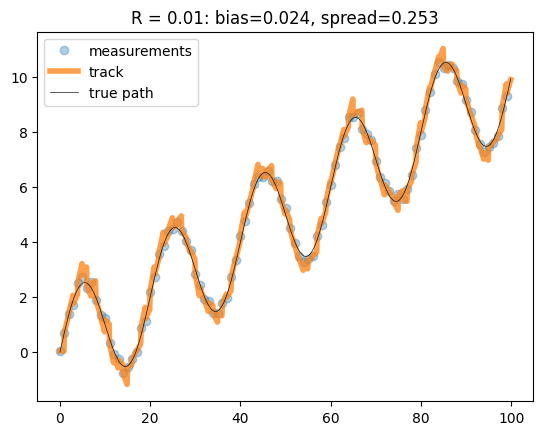

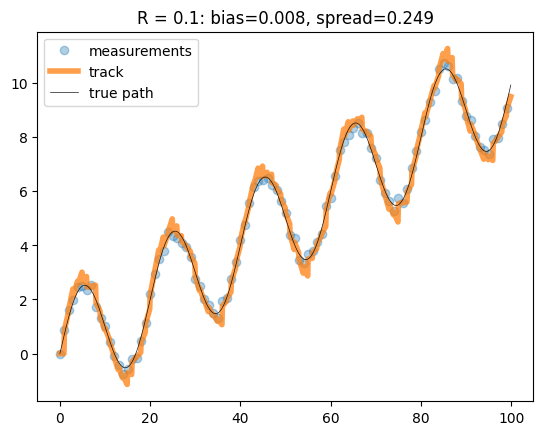

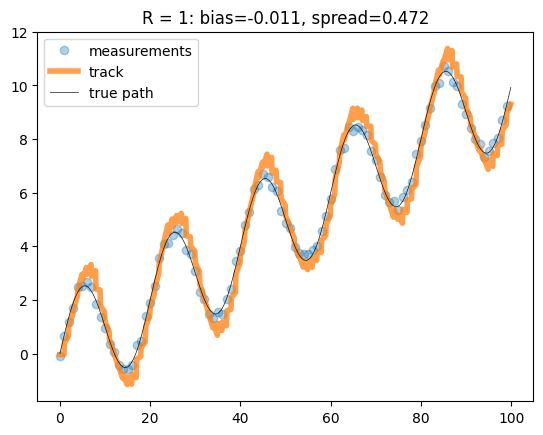

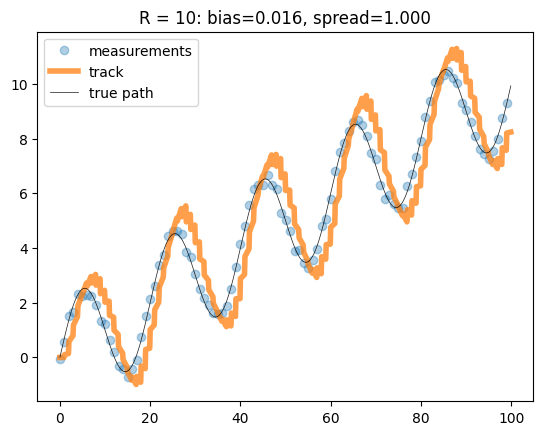

In [ ]:
K2(0.1, 1, 1, 0.01).simulate(*trajectory(0.1), 10).plot("R = 0.01")
K2(0.1, 1, 1, 0.1).simulate(*trajectory(0.1), 10).plot("R = 0.1")
K2(0.1, 1, 1, 1.0).simulate(*trajectory(0.1), 10).plot("R = 1")
K2(0.1, 1, 1, 10.0).simulate(*trajectory(0.1), 10).plot("R = 10")

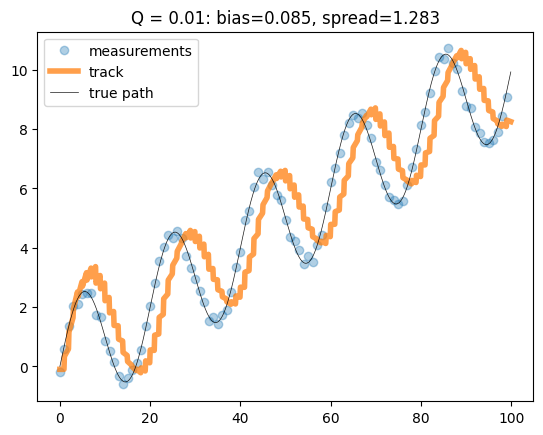

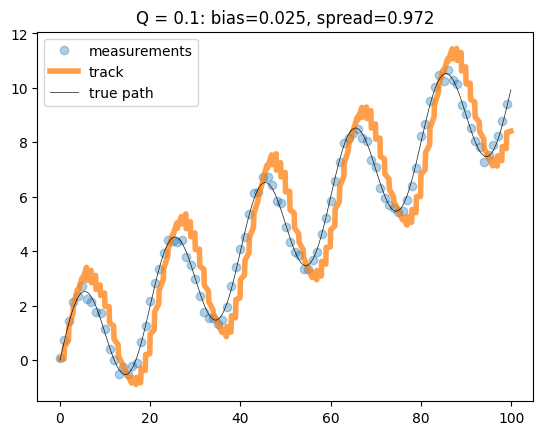

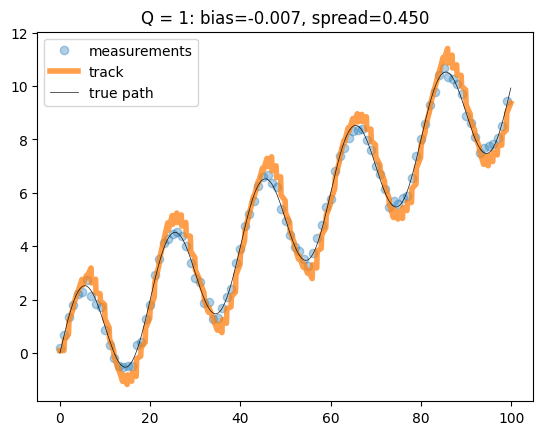

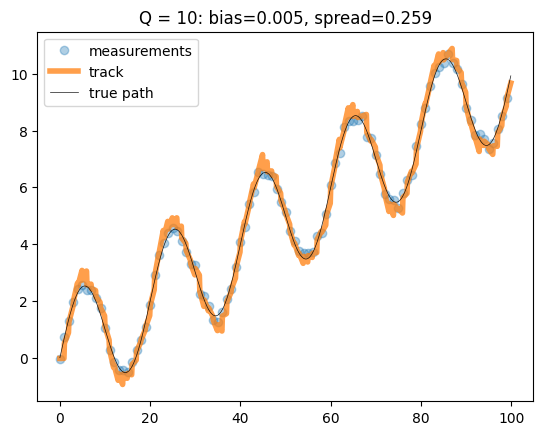

In [ ]:
K2(0.1, 1, 0.01, 1).simulate(*trajectory(0.1), 10).plot("Q = 0.01")
K2(0.1, 1, 0.1, 1).simulate(*trajectory(0.1), 10).plot("Q = 0.1")
K2(0.1, 1, 1, 1).simulate(*trajectory(0.1), 10).plot("Q = 1")
K2(0.1, 1, 10, 1).simulate(*trajectory(0.1), 10).plot("Q = 10")

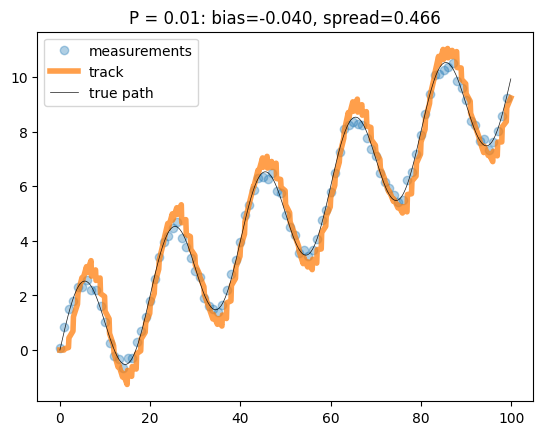

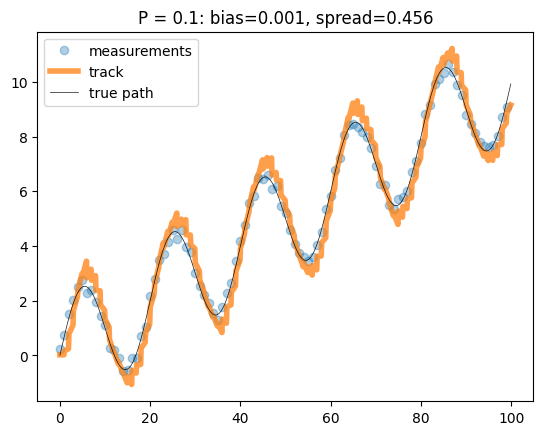

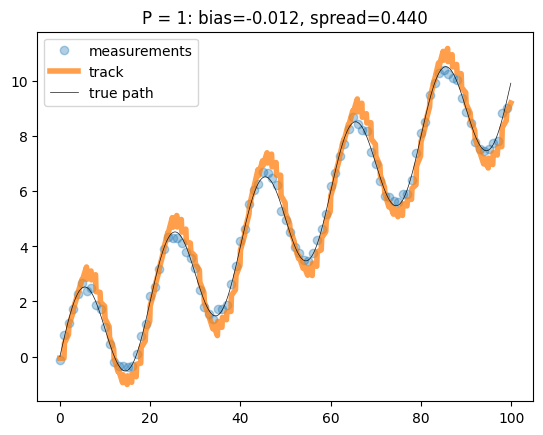

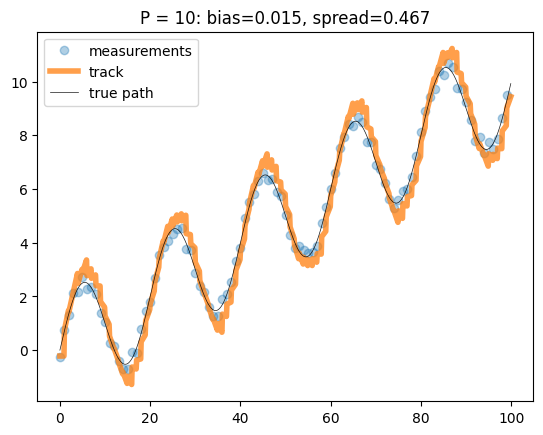

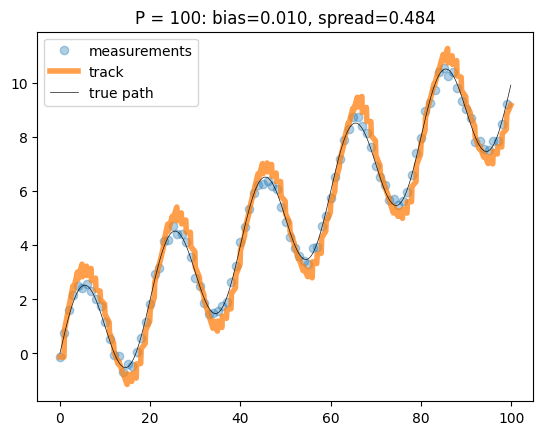

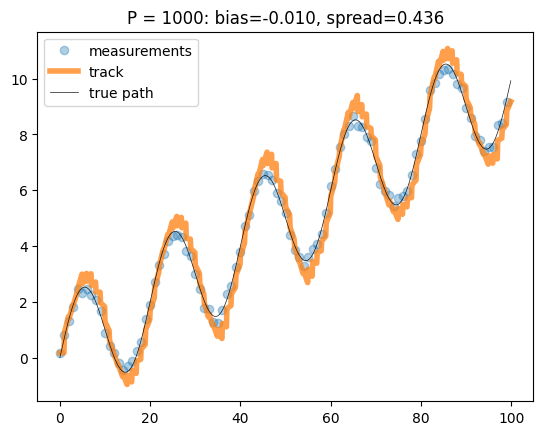

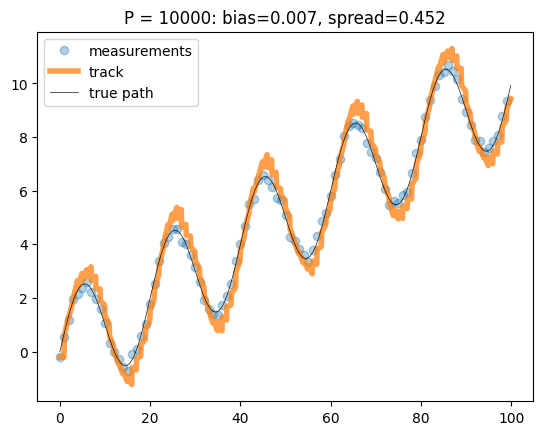

In [ ]:
K2(0.1, 0.01, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 0.01")
K2(0.1, 0.1, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 0.1")
K2(0.1, 1, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 1")
K2(0.1, 10, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 10")
K2(0.1, 100, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 100")
K2(0.1, 1000, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 1000")
K2(0.1, 10000, 1, 1).simulate(*trajectory(0.1), 10).plot("P = 10000")